In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
mini_pieman = niidb.FMriActivationsDb('data/mini_pieman.db',
                                     mask='data/pieman_data/wholebrain.nii.gz')

In [5]:
dtfa = DTFA.DeepTFA(mini_pieman.all(), mask='data/pieman_data/wholebrain.nii.gz', num_factors=100, embedding_dim=2)

05/23/2018 14:35:15 Loading Nifti image data/pieman_data/sub-001-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False)
05/23/2018 14:35:17 Loading Nifti image data/pieman_data/sub-003-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False)
05/23/2018 14:35:20 Loading Nifti image data/pieman_data/sub-002-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False)


In [19]:
dtfa.normalize_activations()

[10.872537612915039, 9.790372848510742, 8.538802146911621]

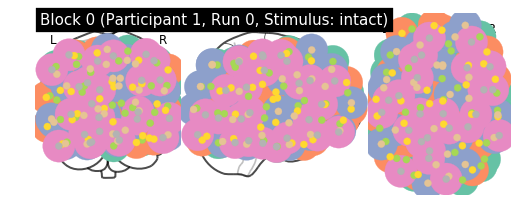

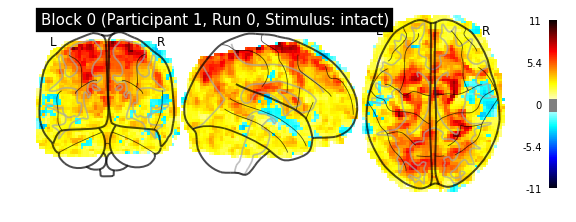

05/23/2018 14:37:27 Reconstruction Error (Frobenius Norm): 6.43852637e+03 out of 5.08479639e+03


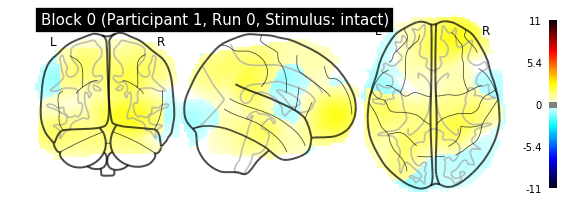

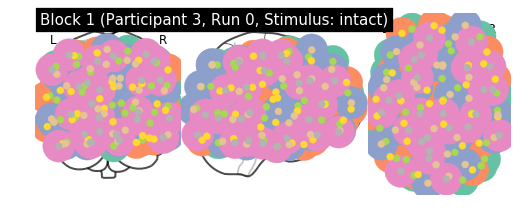

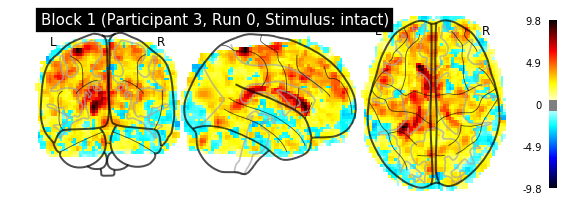

05/23/2018 14:37:53 Reconstruction Error (Frobenius Norm): 6.52618164e+03 out of 5.19534277e+03


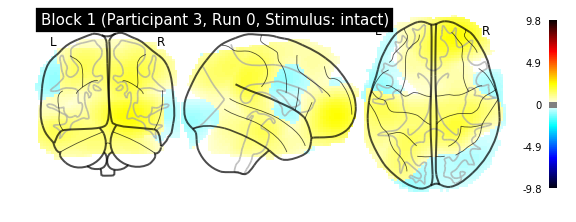

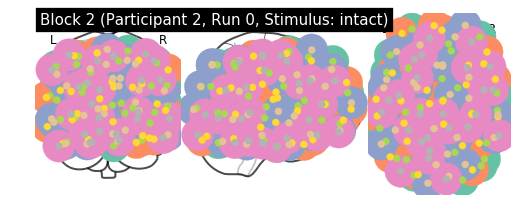

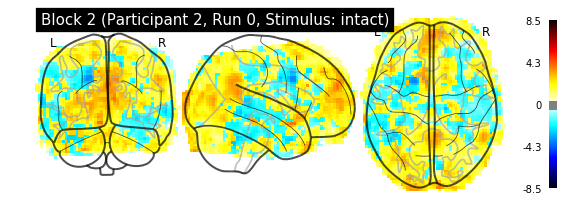

05/23/2018 14:38:18 Reconstruction Error (Frobenius Norm): 6.52617969e+03 out of 5.19534277e+03


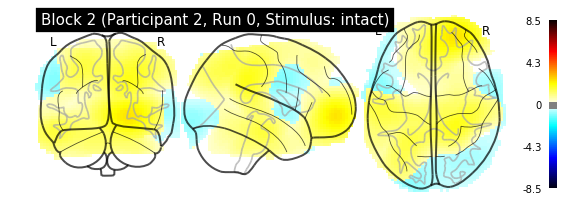

In [6]:
for b in range(dtfa.num_blocks):
    dtfa.plot_factor_centers(b)
    dtfa.plot_original_brain(b)
    dtfa.plot_reconstruction(b)

In [7]:
losses = dtfa.train(num_steps=500, learning_rate=5e-2, log_level=logging.INFO, num_particles=2,
                    batch_size=128, use_cuda=True, checkpoint_steps=10, blocks_batch_size=8, patience=20)

05/23/2018 14:38:19 [Epoch 1] (1197ms) Posterior free-energy 1.20467190e+10
05/23/2018 14:38:19 Saving checkpoint...
05/23/2018 14:38:20 [Epoch 2] (927ms) Posterior free-energy 9.67465472e+09
05/23/2018 14:38:21 [Epoch 3] (905ms) Posterior free-energy 9.68531968e+09
05/23/2018 14:38:22 [Epoch 4] (934ms) Posterior free-energy 8.82814362e+09
05/23/2018 14:38:23 [Epoch 5] (927ms) Posterior free-energy 9.10937600e+09
05/23/2018 14:38:24 [Epoch 6] (915ms) Posterior free-energy 8.64854426e+09
05/23/2018 14:38:25 [Epoch 7] (925ms) Posterior free-energy 8.67887923e+09
05/23/2018 14:38:26 [Epoch 8] (921ms) Posterior free-energy 8.51116749e+09
05/23/2018 14:38:27 [Epoch 9] (911ms) Posterior free-energy 8.30041088e+09
05/23/2018 14:38:28 [Epoch 10] (913ms) Posterior free-energy 8.40579789e+09
05/23/2018 14:38:29 [Epoch 11] (922ms) Posterior free-energy 8.10897766e+09
05/23/2018 14:38:29 Saving checkpoint...
05/23/2018 14:38:30 [Epoch 12] (932ms) Posterior free-energy 8.09304781e+09
05/23/2018 14:

Epoch   245: reducing learning rate of group 0 to 5.0000e-03.


05/23/2018 14:42:08 [Epoch 247] (939ms) Posterior free-energy 7.11661670e+09
05/23/2018 14:42:09 [Epoch 248] (935ms) Posterior free-energy 7.06639770e+09
05/23/2018 14:42:10 [Epoch 249] (936ms) Posterior free-energy 7.05105203e+09
05/23/2018 14:42:11 [Epoch 250] (918ms) Posterior free-energy 7.05792563e+09
05/23/2018 14:42:12 [Epoch 251] (922ms) Posterior free-energy 7.04890624e+09
05/23/2018 14:42:12 Saving checkpoint...
05/23/2018 14:42:13 [Epoch 252] (932ms) Posterior free-energy 7.03941222e+09
05/23/2018 14:42:14 [Epoch 253] (918ms) Posterior free-energy 7.03624141e+09
05/23/2018 14:42:15 [Epoch 254] (918ms) Posterior free-energy 7.03589325e+09
05/23/2018 14:42:16 [Epoch 255] (924ms) Posterior free-energy 7.03311053e+09
05/23/2018 14:42:16 [Epoch 256] (928ms) Posterior free-energy 7.02926950e+09
05/23/2018 14:42:17 [Epoch 257] (918ms) Posterior free-energy 7.02639002e+09
05/23/2018 14:42:18 [Epoch 258] (917ms) Posterior free-energy 7.02496256e+09
05/23/2018 14:42:19 [Epoch 259] (92

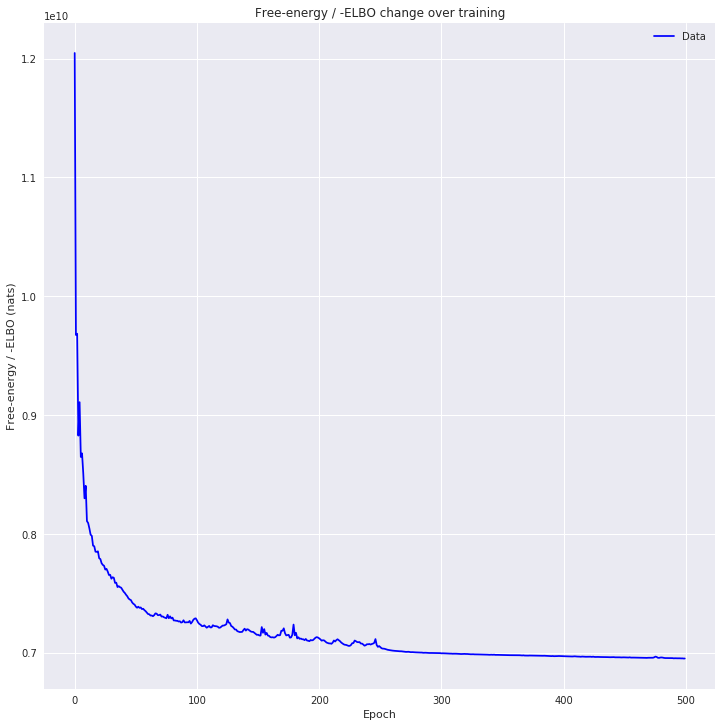

In [8]:
utils.plot_losses(losses)

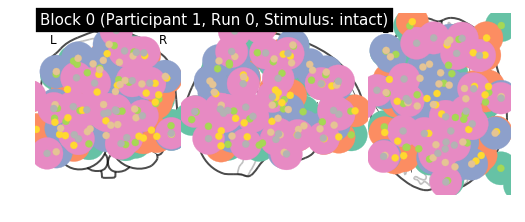

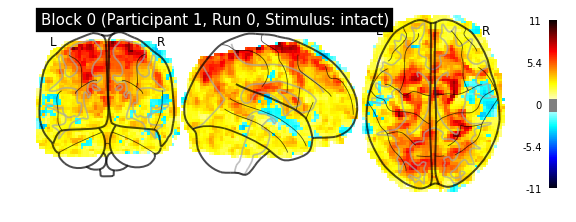

05/23/2018 14:58:31 Reconstruction Error (Frobenius Norm): 4.91099072e+03 out of 5.08479639e+03


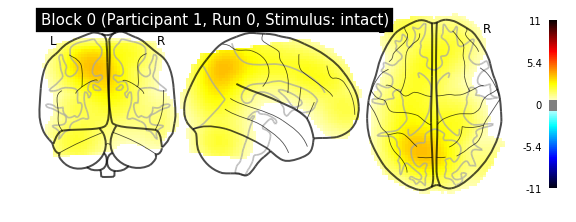

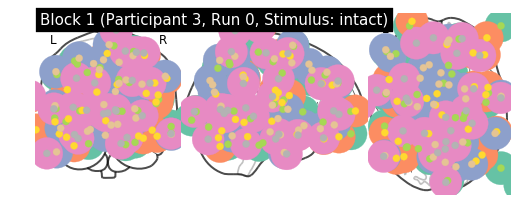

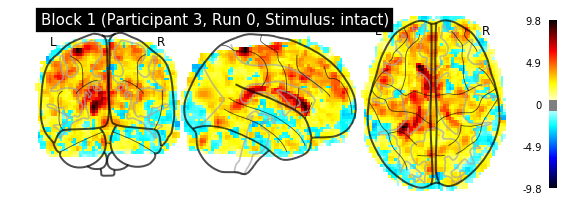

05/23/2018 14:58:56 Reconstruction Error (Frobenius Norm): 4.95253955e+03 out of 5.19534277e+03


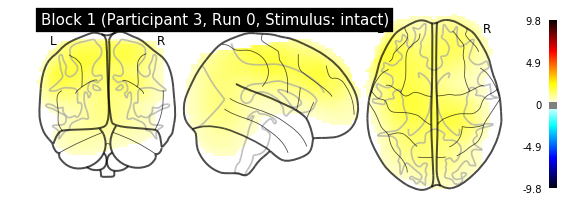

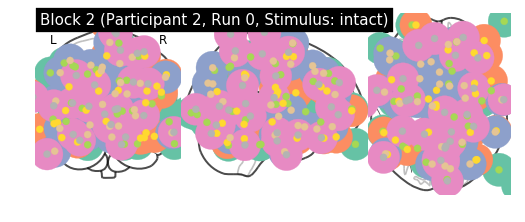

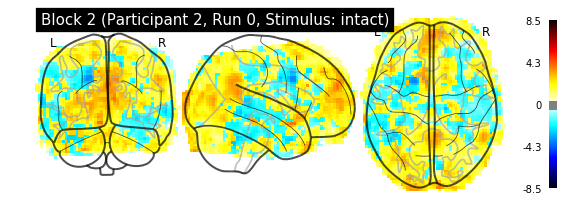

05/23/2018 14:59:22 Reconstruction Error (Frobenius Norm): 4.80652539e+03 out of 5.19534277e+03


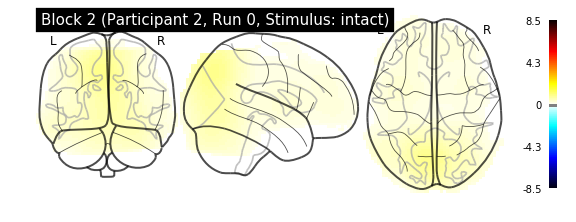

In [20]:
for b in range(dtfa.num_blocks):
    dtfa.plot_factor_centers(b)
    dtfa.plot_original_brain(b)
    dtfa.plot_reconstruction(b)

In [10]:
def task_rest_labeler(block):
    if 'rest' in block.task:
        return 'Rest'
    else:
        return 'Task'

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


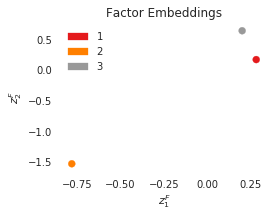

In [11]:
dtfa.scatter_factor_embedding(labeler=lambda block: block.subject)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


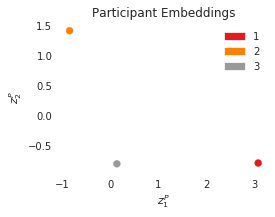

In [12]:
dtfa.scatter_subject_embedding(labeler=lambda block: block.subject)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


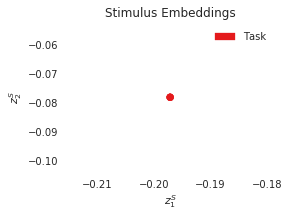

In [13]:
dtfa.scatter_task_embedding(t=None, labeler=task_rest_labeler)

In [14]:
dtfa.results(0)

{'factor_centers': 
  -32.7176  -61.7134   47.6169
   14.4152   15.7511   -1.7086
  -53.5334   -4.9567    1.3255
   30.6181  -57.1298   -0.9339
   27.0044  -32.3537   60.4766
  -54.8368   39.5408   37.1846
   66.4665   66.3703  -26.0076
  -44.5416   35.9941  -12.4013
    9.9763  -96.7638   -1.8868
   53.2665   -4.0076   11.1016
  -22.0539   -6.4767   38.7858
   10.9400   24.5707   31.4468
   21.9313   51.7841   28.6669
   18.1979  -30.3230  -36.8299
    6.1700    5.6254   67.2971
  -20.3857  -63.2658  -36.0844
   49.8824  -14.1339    6.3687
  -33.8099  -61.8213   49.4393
  -29.7354   66.0062   -1.1267
   85.5221 -101.4817   -9.9510
  -56.5495  -40.2077   -9.1821
   -8.9856  -74.1698   43.5414
   28.4258  -26.9806  -34.6370
  -36.6008  -15.6828   50.9526
   66.0016  -83.8228  -17.0056
  -56.1483  -46.1576  -13.4146
  -42.5190  -55.2442   -8.6484
   -9.8922  -47.0450   37.0032
   49.2903   35.3085   27.5593
   -2.5727  -17.0466  -11.7716
   45.3629  -70.3141  -21.6859
  -83.4728  -12.746